In [29]:
# NetworkX Tutorial


In [30]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

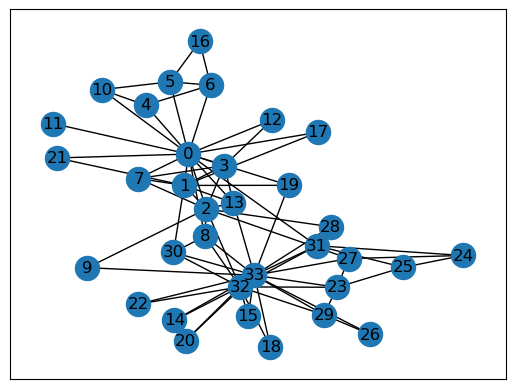

In [31]:
# Social networks
karate = nx.karate_club_graph()
nx.draw_networkx(karate)

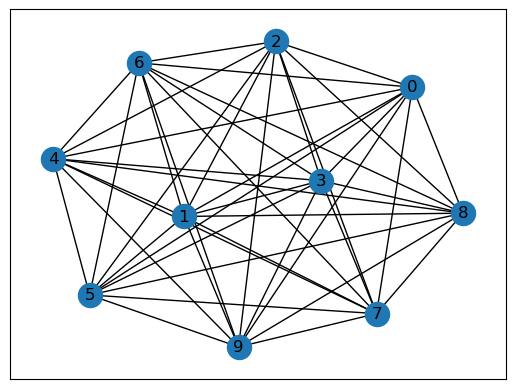

In [32]:
c10 = nx.complete_graph(10)
nx.draw_networkx(c10)

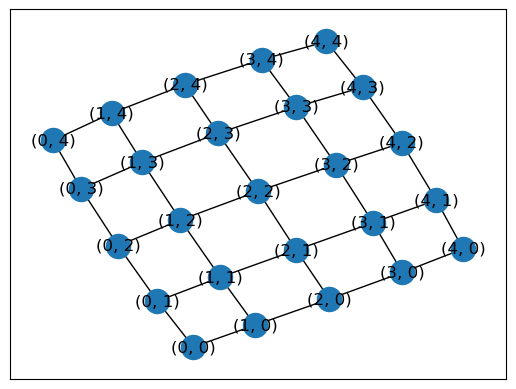

In [33]:
lattice5 = nx.grid_2d_graph(5,5)
nx.draw_networkx(lattice5)

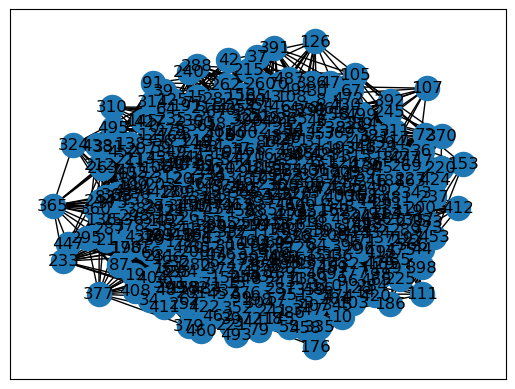

In [34]:
# Erdos Renyi (Random) Graphs:  G(n, p)
# n nodes and there is an edge with probability p
# The Erdős–Rényi model is interesting because of the 
# structural properties of the graphs it generates. 
# For example, these graphs undergo a phase transition 
# as p changes. When p is below a certain threshold, 
# the graph will almost surely be composed of many small 
# components. When p is above this threshold, the graph 
# will almost surely contain a single giant component 
# that includes a large fraction of the nodes, with the 
# rest of the nodes forming smaller components. The study 
# of these phase transitions and their implications in 
# network theory has been a significant focus in the 
# field of complex networks.

er = nx.erdos_renyi_graph(500, .05)
nx.draw_networkx(er)

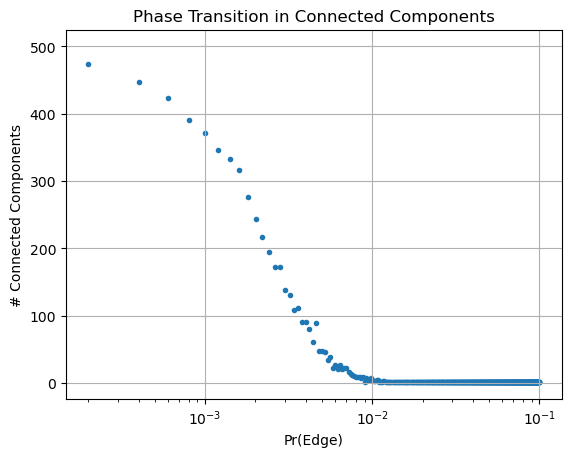

In [35]:
n = 500
P = np.linspace(0, .1, 500)
cc = []
for p in P:
    G = nx.erdos_renyi_graph(n,p)
    cc.append(nx.number_connected_components(G))

plt.xscale('log')   
plt.scatter(P, cc, marker='.')
plt.title("Phase Transition in Connected Components")
plt.xlabel("Pr(Edge)")
plt.ylabel("# Connected Components")
plt.grid()

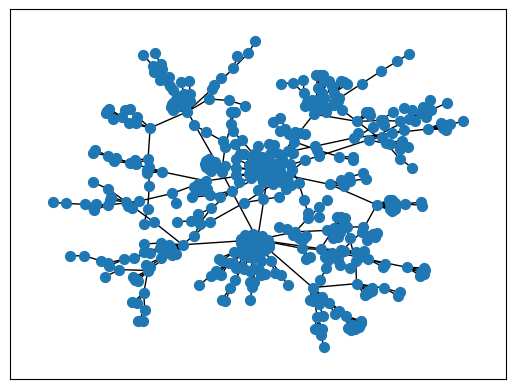

In [36]:
# \The Barabási–Albert (BA) model is a model of network growth with preferential attachment, 
# which is often used to generate random scale-free networks. Scale-free networks have the 
# property that the node degrees follow a power law distribution. The BA model achieves this 
# by incrementally adding nodes to the network and preferring to attach new nodes to existing 
# nodes with higher degree.
# Applications: 
#  - Internet infrastructur
#  - Social networks
#  - Biological networks
#
# G(n, m): n = number of nodes, m = number of edges to attach from a new node to existing nodes
# A. L. Barabási and R. Albert “Emergence of scaling in random networks”, Science 286, pp 509-512, 1999.

ba = nx.barabasi_albert_graph(500, 1)
nx.draw_networkx(ba, with_labels=False, node_size = 50)



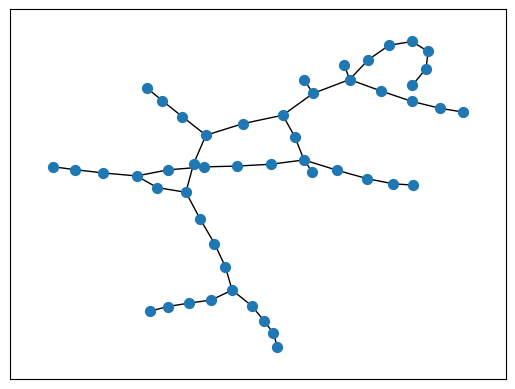

In [66]:
# Watts-Strogatz "Small World" Graphs
# Short average path lengths
# High clustering

# Social Networks: In social networks, the small-world phenomenon is often referred to as 
# "six degrees of separation," the idea being that any two people on the planet can be 
# connected through a surprisingly small number of mutual acquaintances. 

# Neural Networks: The connections between neurons in the brain also exhibit 
# small-world properties. There is a high level of local clustering of connections, 
# but neurons can also reach other neurons that are far away via a relatively 
# small number of steps.

# Collaboration Networks: In networks of scientific collaboration 
# (where nodes are scientists and edges represent collaboration on a 
# paper), it has been found that most pairs of scientists are connected 
# through a short path of collaborations, reflecting the small-world property.

# Power Grids: The western United States power grid, which was studied 
# in the original Watts-Strogatz paper, is another example of a small-world 
# network, where power stations are interconnected in a way that allows 
# power to be transmitted efficiently across long distances.

# Not Scale-Free!



# Parameters for Watts-Strogatz Graph
n = 50   # Number of nodes
k = 3    # Each node is connected to k nearest neighbors
p = 0.3  # The probability of rewiring each edge

# Create a Watts-Strogatz graph
ws = nx.watts_strogatz_graph(n, k, p)

# Draw the graph
#plt.figure(figsize=(10,10))
nx.draw_networkx(ws, with_labels=False, node_size=50)
plt.show()





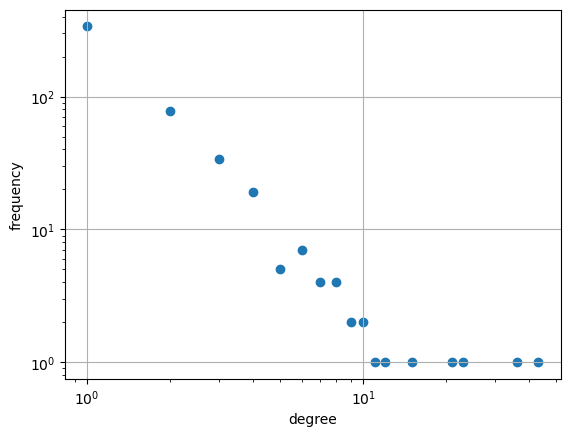

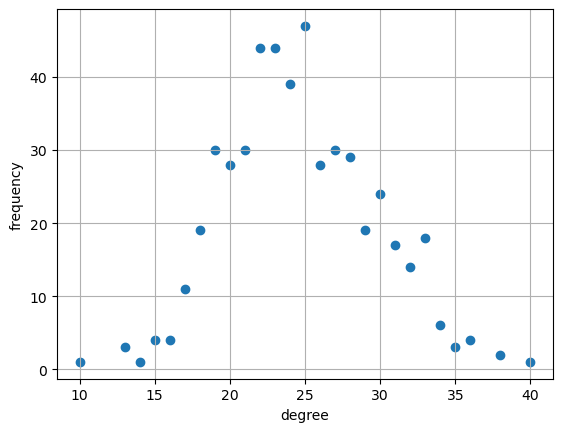

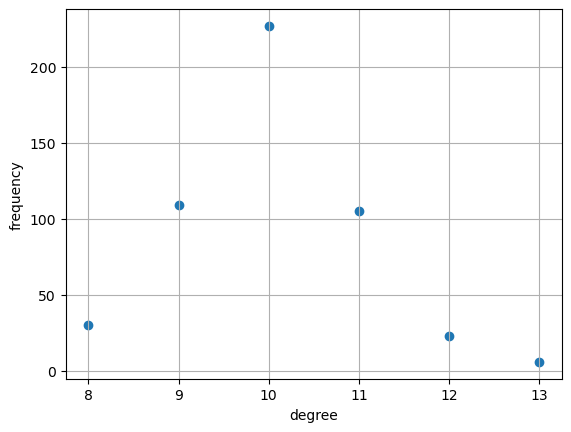

In [38]:
def degree_distribution(G):
    degrees = [deg for node, deg in G.degree()]
    dd = Counter(degrees)
    xs = [t[0] for t in dd.items()]
    ys = [t[1] for t in dd.items()]
    return xs, ys

def plot_dd(G, log_scale=True):
    xs, ys = degree_distribution(G)
    plt.xlabel('degree')
    plt.ylabel('frequency')
    if log_scale:
        plt.xscale('log')
        plt.yscale('log')
    plt.scatter(xs, ys)
    plt.grid()
    plt.show()
    
plot_dd(ba)
plot_dd(er, log_scale=False)
plot_dd(ws, log_scale=False)

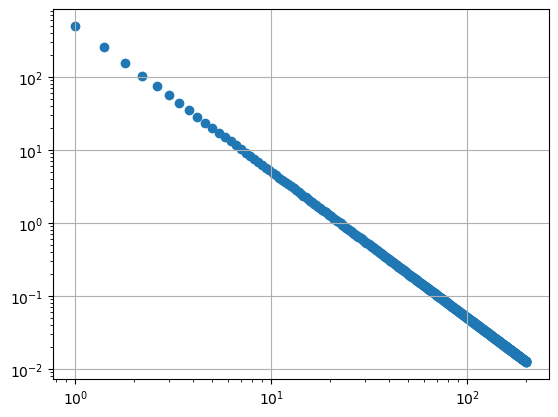

In [39]:
# Power Law distributions
# Frequency = C x Degree ^ (-gamma)

gamma = -2
xs = np.linspace(1, 200, 500)
ys = 500 * xs ** gamma
plt.scatter(xs, ys)    
plt.xscale('log')
plt.yscale('log')
plt.grid()    
plt.show()

Label Propagation is a simple yet efficient method for community detection in graphs. The main idea behind this algorithm is to propagate labels (representing community IDs) throughout the network and form communities based on the process of label propagation.

Here is a basic outline of how the label propagation algorithm works:

1. **Initialization**: Each node is initialized with a unique label (i.e., each node is considered its own community at the beginning).

2. **Propagation Step**: Nodes are visited in a random order. During each visit, the node updates its label to the label that the majority of its neighbors currently have. Ties are broken uniformly and randomly.

3. **Termination**: The algorithm terminates when each node has a label that the maximum number of their neighbors also have. At the end of the propagation step, nodes with the same label are considered to be in the same community.

The Label Propagation algorithm has the advantage of not requiring prior knowledge of the number or sizes of the communities, and it tends to be fast because it only needs to inspect local information and make decisions based on that. However, it can sometimes lead to less precise community structures compared to other methods, especially on graphs with weak community structure. In addition, it doesn't guarantee a unique partitioning on a given graph due to the randomness in the algorithm.

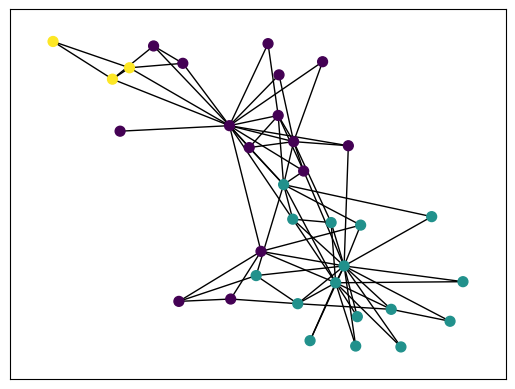

In [146]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import label_propagation_communities

def visualize_communities(G, node_size=50, with_labels=False):

    # Detect communities
    communities = label_propagation_communities(G)


    # Map node to a color based on the community it belongs to
    color_map = {}
    for idx, com in enumerate(communities):
        for node in com:
            color_map[node] = idx

    # Create a list of colors for all nodes in the graph
    colors = [color_map[node] for node in G.nodes]

    # Draw the graph
    nx.draw_networkx(G, node_color=colors, with_labels=with_labels, cmap='viridis', node_size=node_size)
    plt.show()
    
visualize_communities(karate)


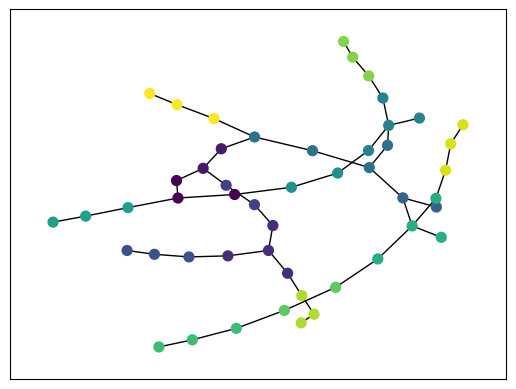

In [147]:
visualize_communities(ws)

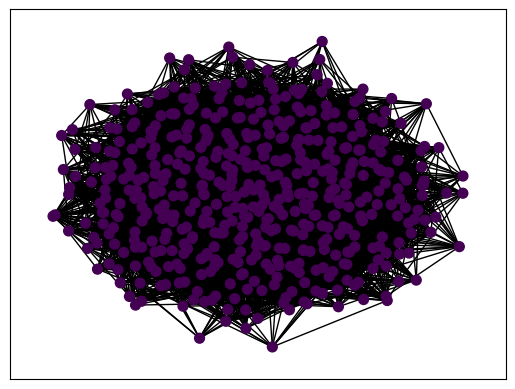

In [148]:
visualize_communities(er)

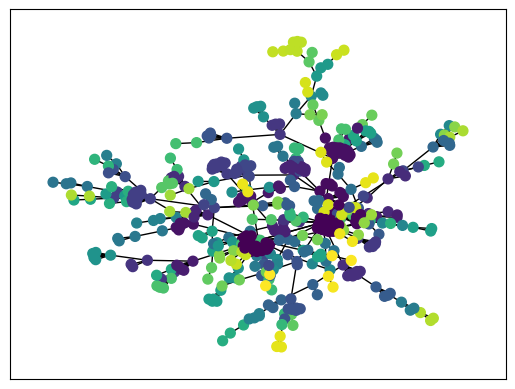

In [149]:
visualize_communities(ba)

In [150]:
# Are there "components" or communities" hidden in the protein-protein interaction data?
# If so, how many?
import pandas as pd
import sqlite3

con = sqlite3.connect('ppi.db')
ppi = pd.read_sql_query("SELECT * FROM ppi", con)
ppi

,a,b
0,ENSG00000000005,ENSG00000061656
1,ENSG00000000005,ENSG00000099968
2,ENSG00000000005,ENSG00000104765
3,ENSG00000000005,ENSG00000105383
4,ENSG00000000005,ENSG00000114455
...,...,...
52543,ENSG00000273899,ENSG00000273899
52544,ENSG00000275302,ENSG00000278619
52545,ENSG00000275774,ENSG00000275774
52546,ENSG00000276070,ENSG00000278619


In [117]:
# Convert to a graph
G_ppi = nx.from_pandas_edgelist(ppi, 'a', 'b', create_using=nx.Graph())
cc_ppi = list(nx.connected_components(G_ppi))
len(list(cc_ppi))
# There are 72 connected components in the PPI data!

72

In [151]:
# Not so interesting - one big hairball and lots of spurious fringe interactions.

for i, cc in enumerate(cc_ppi):
    print(i, len(cc))

0 8149
1 3
2 3
3 2
4 2
5 2
6 2
7 1
8 2
9 2
10 2
11 2
12 3
13 2
14 2
15 2
16 2
17 1
18 2
19 2
20 1
21 1
22 2
23 1
24 2
25 3
26 1
27 1
28 2
29 3
30 1
31 2
32 1
33 1
34 1
35 2
36 2
37 2
38 2
39 2
40 1
41 1
42 1
43 1
44 2
45 1
46 1
47 1
48 2
49 1
50 2
51 1
52 1
53 2
54 1
55 2
56 2
57 1
58 2
59 2
60 2
61 3
62 2
63 1
64 2
65 1
66 3
67 2
68 3
69 2
70 1
71 1


In [152]:
hairball = cc_ppi[0]
G_hairball = G_ppi.subgraph(hairball)
communities = label_propagation_communities(G_hairball)
# communities

5 10


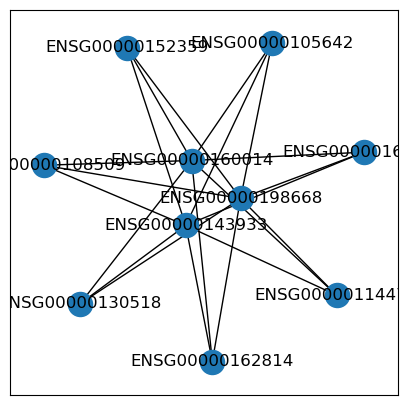

7 10


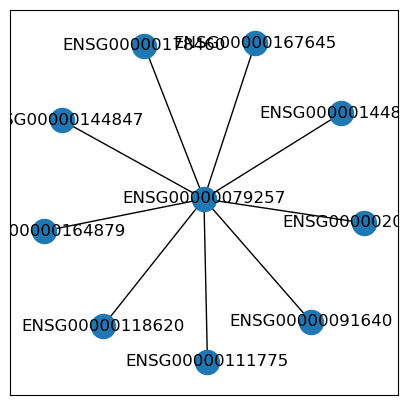

15 14


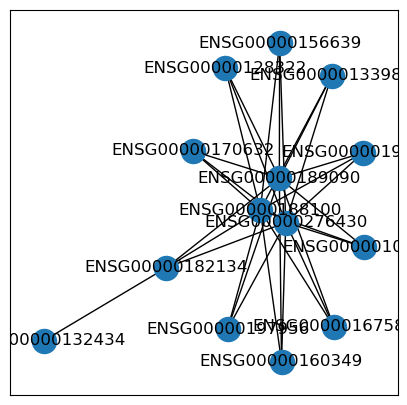

18 29


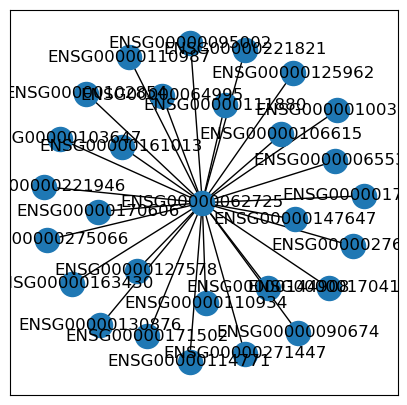

57 16


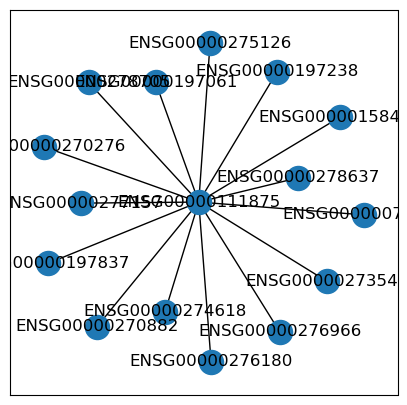

68 10


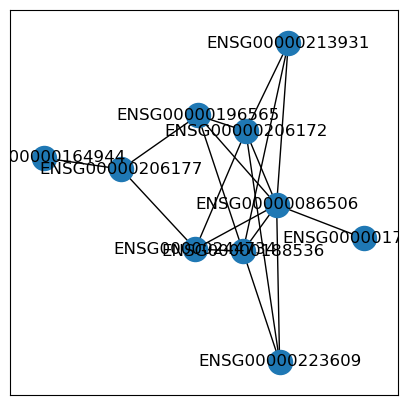

104 16


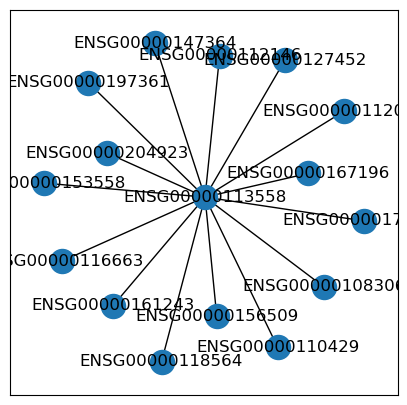

122 16


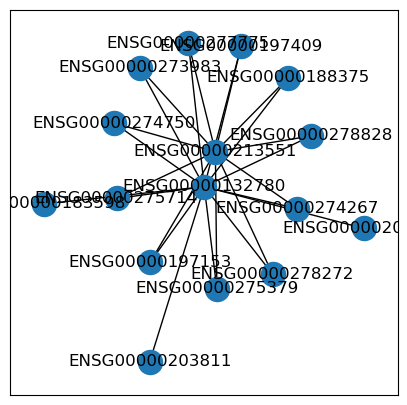

In [153]:

for i, community in enumerate(communities):
    # print(i, len(community))
    if 9 < len(community) < 100:
        plt.figure(figsize=(5,5), dpi=100)
        print(i, len(community))
        subG = G_ppi.subgraph(community)
        nx.draw_networkx(subG)
        plt.show()

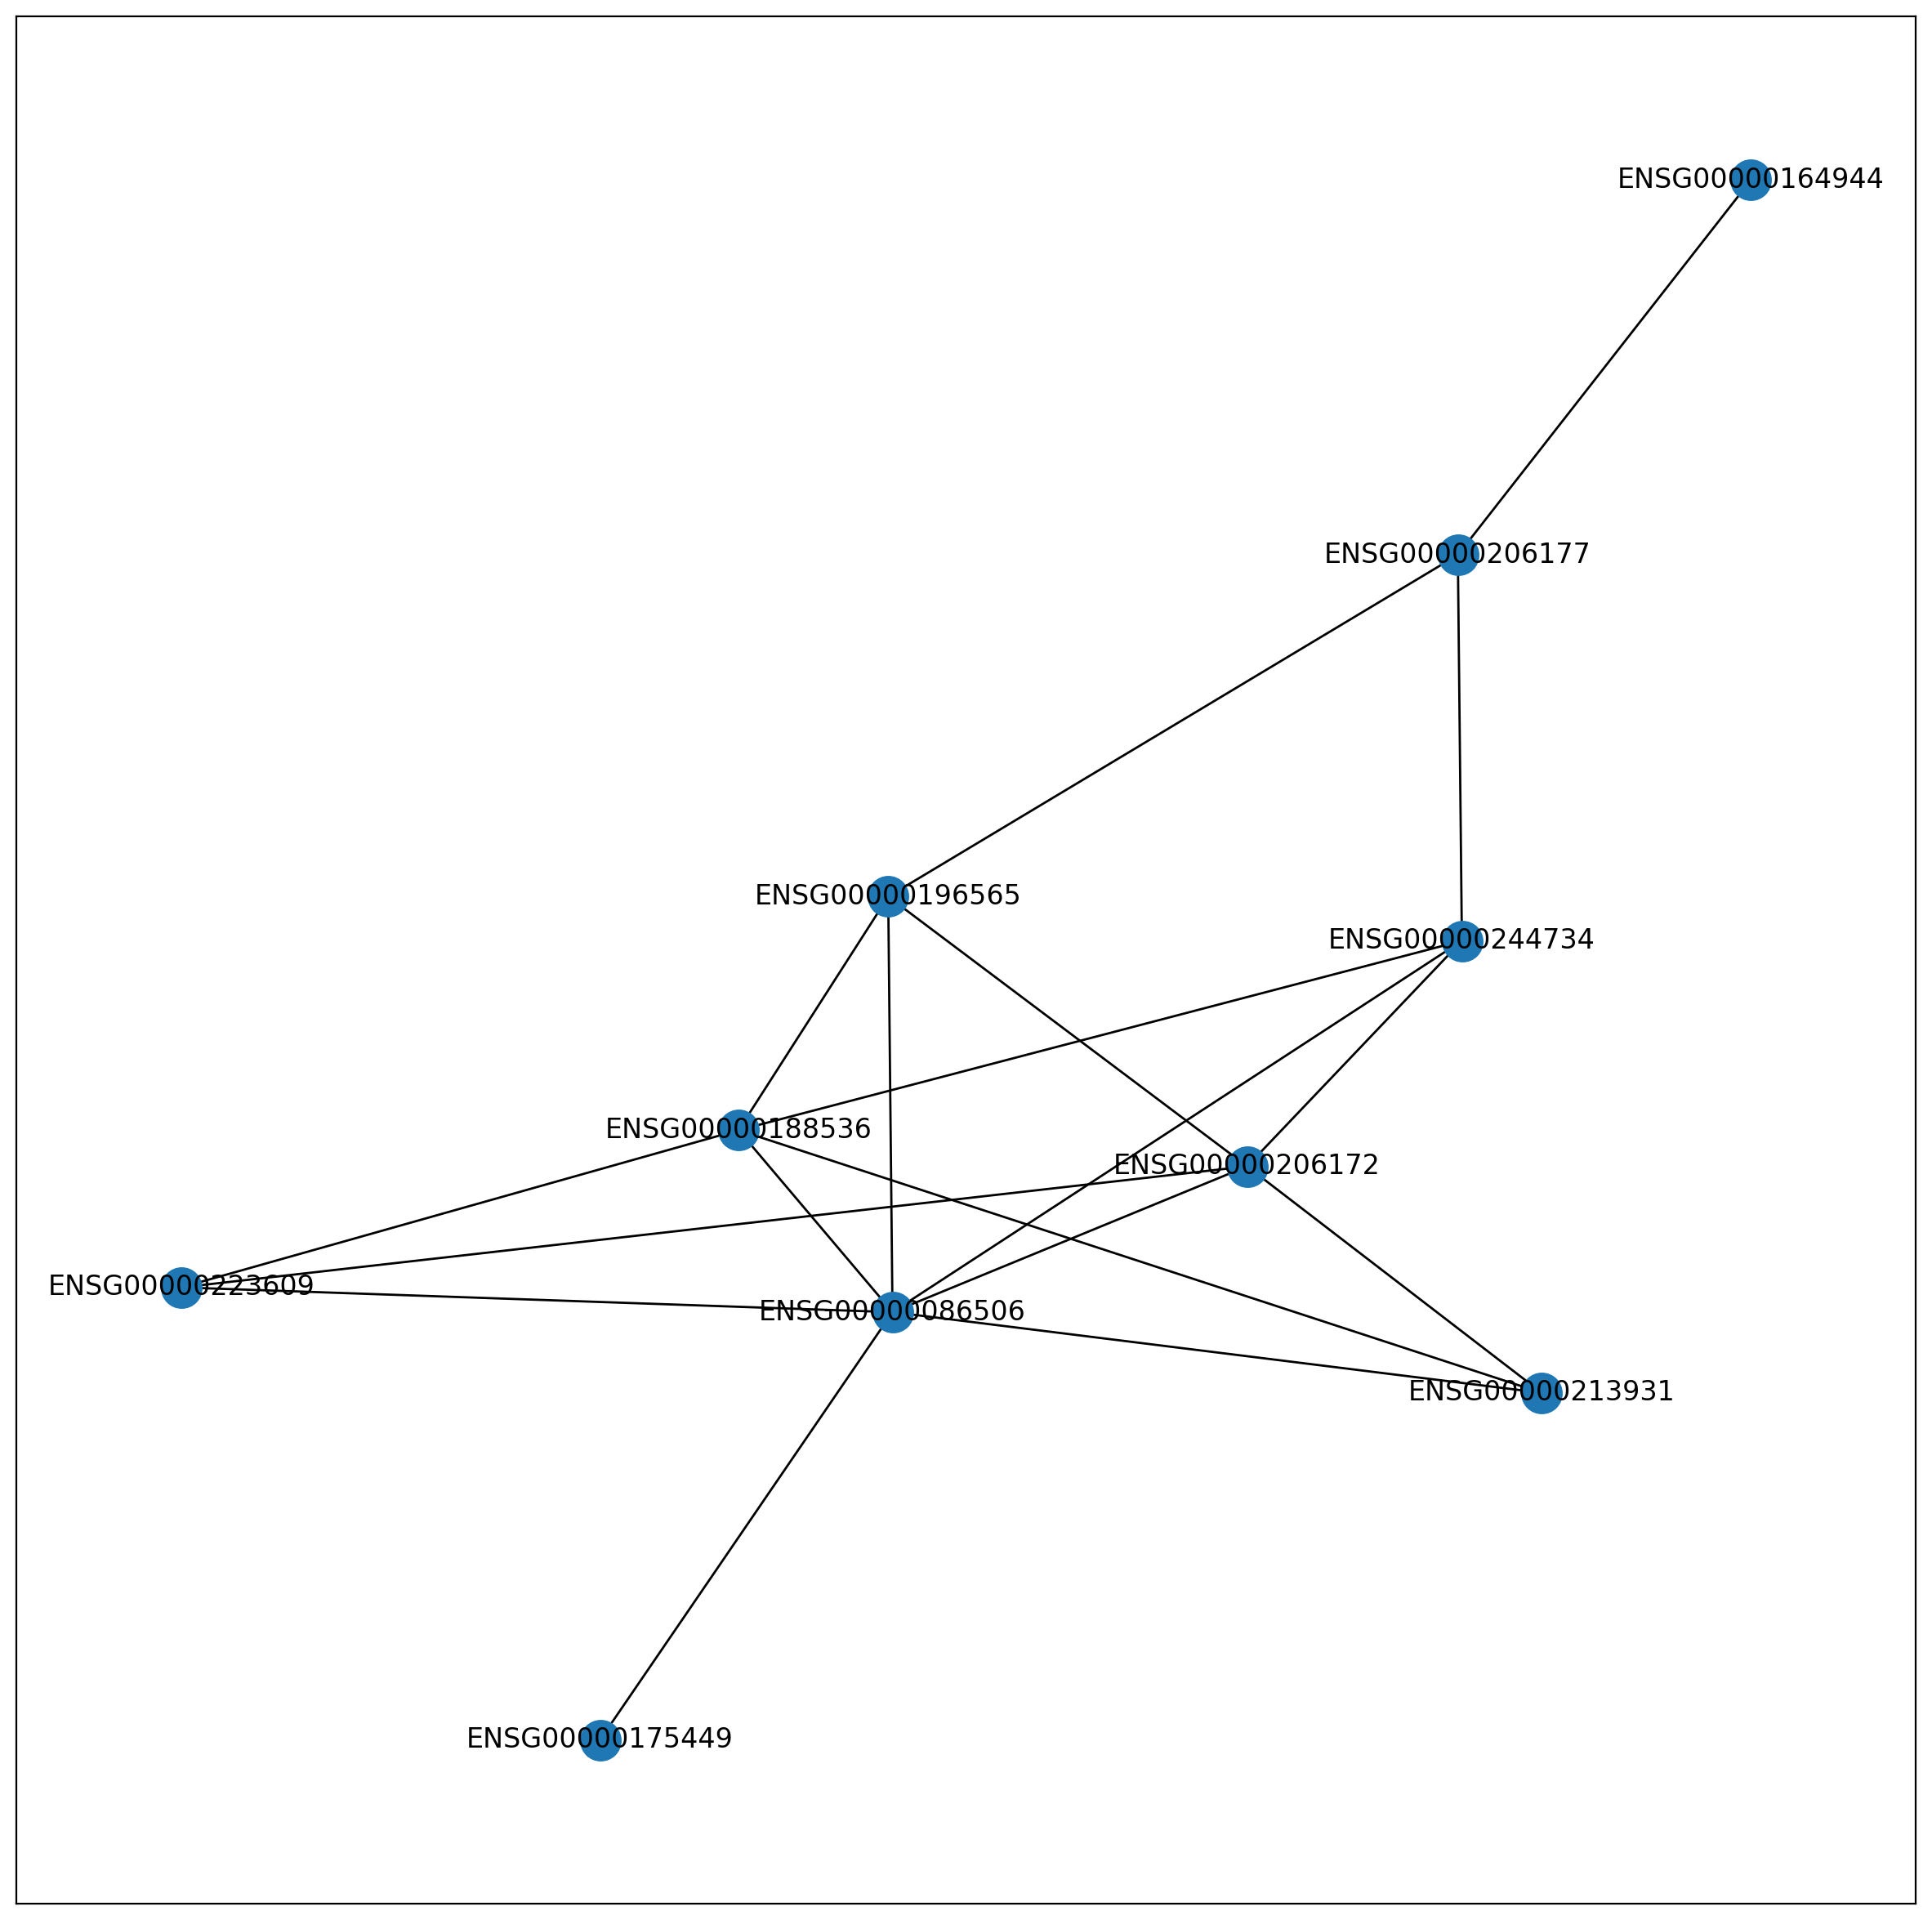

In [154]:
G68 = G_ppi.subgraph(list(communities)[68])
plt.figure(figsize=(15,15), dpi=200)
nx.draw_networkx(G68)

In [145]:
G68.nodes()
# ENSG00000206172 = HBA2
# ENSG00000206172 = HBA1
# ENSG00000086506 = HBQ1
# ENSG00000244734 = HBB

NodeView(('ENSG00000206177', 'ENSG00000213931', 'ENSG00000164944', 'ENSG00000223609', 'ENSG00000206172', 'ENSG00000175449', 'ENSG00000086506', 'ENSG00000188536', 'ENSG00000244734', 'ENSG00000196565'))

From ChatGPT:

The HBA1, HBA2, and HBQ1 genes all code for components of hemoglobin, the protein molecule in red blood cells that carries oxygen from the lungs to the body's tissues and returns carbon dioxide from the tissues to the lungs.

Here is some specific information about each gene:

HBA1: This gene provides instructions for making a protein called alpha-globin, which is a component (subunit) of hemoglobin. More specifically, it helps produce a form of hemoglobin known as hemoglobin A, which is the most common form of this protein in mature red blood cells.

HBA2: This gene also provides instructions for making alpha-globin. Both HBA1 and HBA2 are located very close to each other on chromosome 16 and together are known as the "alpha-globin locus". Mutations in either or both of these genes can lead to alpha-thalassemia, a blood disorder that reduces the production of hemoglobin.

HBQ1: This gene provides instructions for making a protein called hemoglobin subunit theta 1. This protein is a component of a form of hemoglobin known as hemoglobin A2, which is a minor form of hemoglobin present in small amounts in mature red blood cells. Although the exact function of hemoglobin subunit theta 1 is unclear, it is thought to be involved in the formation of hemoglobin during the development of red blood cells.

So, in summary, all three genes are involved in the production of hemoglobin, but they contribute to different components (subunits) of the protein. Mutations in these genes can lead to conditions such as thalassemia, which affect the body's ability to produce functioning hemoglobin.

Hemoglobin is a protein found in red blood cells that carries oxygen from the lungs to all parts of the body. It is composed of four protein subunits: two alpha globin chains and two beta globin chains in the most common form of hemoglobin in adults, called hemoglobin A (HbA).

There are several genes that contribute to the production of different subunits of hemoglobin:

1. **HBA1 and HBA2**: These genes encode the alpha globin subunits. Both genes are located on chromosome 16.

2. **HBB**: This gene encodes the beta globin subunit, the other component of HbA. HBB is located on chromosome 11.

3. **HBD**: This gene encodes the delta globin subunit. Hemoglobin A2 (HbA2) is a minor form of hemoglobin found in adults that consists of two alpha chains and two delta chains. HBD is located on chromosome 11, close to HBB.

4. **HBG1 and HBG2**: These genes encode the gamma globin subunits. Hemoglobin F (HbF) is the main type of hemoglobin present during fetal development, and it consists of two alpha chains and two gamma chains. After birth, the production of gamma chains decreases and beta chain synthesis increases, leading to the replacement of HbF with HbA in the blood. HBG1 and HBG2 are also located on chromosome 11.

5. **HBE1**: This gene encodes the epsilon globin subunit. Hemoglobin E is a part of embryonic hemoglobin which is expressed in the early stages of embryonic development and then its expression decreases.

6. **HBZ**: This gene encodes the zeta globin subunit. Zeta globin combines with epsilon globin to form hemoglobin Gower-1 (ζ2ε2), and with gamma globin to form hemoglobin Portland-1 (ζ2γ2), both of which are embryonic hemoglobins.

7. **HBQ1**: As mentioned before, this gene encodes the theta globin subunit, and its exact function is not very clear.

Each of these genes can undergo mutations that could affect the production and function of hemoglobin, leading to various types of hemoglobinopathies, including different forms of thalassemia and sickle cell disease.

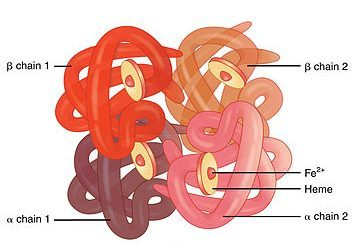

What is thalassemia?

Thalassemia is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin, the protein in red blood cells that carries oxygen. The disorder results in excessive destruction of red blood cells, which leads to anemia.

Thalassemia is caused by mutations in the DNA of cells that make hemoglobin — the substance in your red blood cells that carries oxygen throughout your body. The mutations associated with thalassemia are passed from parents to children.

Thalassemias are classified according to which part of the hemoglobin molecule is affected. In alpha thalassemia, production of the alpha globin chain is affected, while in beta thalassemia, production of the beta globin chain is affected.

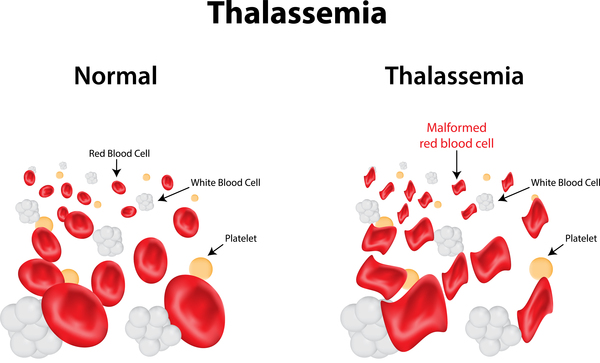